1. Install library preprocess image

In [1]:
! pip install pillow
! pip install python-resize-image
! pip install opencv-python

2. Hubungkan ke dataset dengan GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Preproces Resize

Size (old):(650, 650)
Size (new):(256, 256)


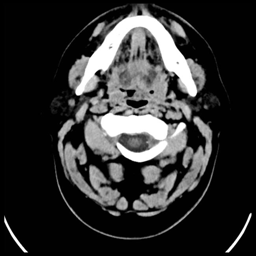

In [18]:
# Import Library
import os
from PIL import Image
import glob

# Path file gambar
img_path = '/content/drive/MyDrive/Stroke/Hemorrhagic-1.jpg'

# Membuka file gambar
img = Image.open(img_path)

# Menghitung ukuran untuk resize gambar
width, height = img.size
new_width = 256
new_height = int(height * new_width / width)

# Meresize gambar
rimage = img.resize((new_width, new_height))

print('Size (old):{}'.format(img.size))
print('Size (new):{}'.format(rimage.size))

# Menampilkan gambar yang telah diresize
display(rimage)

# Menyimpan gambar yang telah diresize
rimage.save('/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg')

4. Preprocess Grayscale

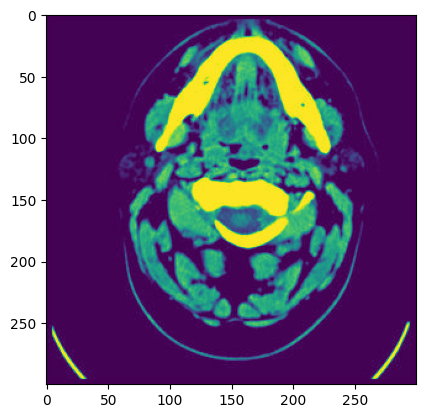

In [4]:
# Import Library
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load Data
img_path = '/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg'
img = mpimg.imread(img_path)
plt.imshow(img)

In [ ]:
# Membuat gambar jadi grayscale
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
plt.imshow(img_gray)

# Menyimpan gambar yang telah dilakukan grayscale
cv2.imwrite('/content/drive/MyDrive/Stroke/Dataset-Gambar/hemorrhagic1grayscale.jpg',img_gray)

5. Preprocess Thresholding (Adaptive Thresholding)

Original grayscale


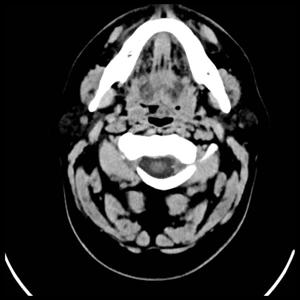

Adaptive Threshold


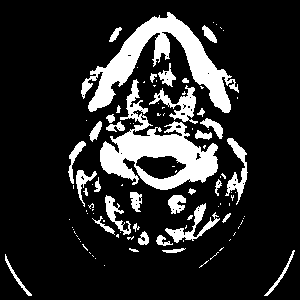

True

In [7]:
# Import Library
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

# Load data gambar
img = cv2.imread('/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg', 0)

# Melakukan thresholding
ret, img_threshold = cv2.threshold(img, 150, 255,cv2.ADAPTIVE_THRESH_MEAN_C)

# Plot the images
print('Original grayscale')
cv2_imshow(img)
print('Adaptive Threshold')
cv2_imshow(img_threshold)

# Menyimpan gambar hasil threshold
cv2.imwrite('/content/drive/MyDrive/Stroke/Dataset-Gambar/hemorrhagic1threshold.jpg',img_threshold)



6. Preprocessing Segmentation (Edge Detection (Canny))

Original grayscale


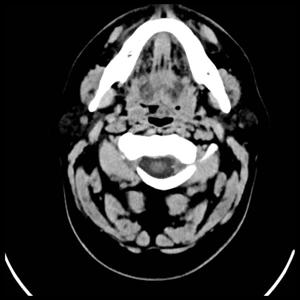

Edge Detection Canny


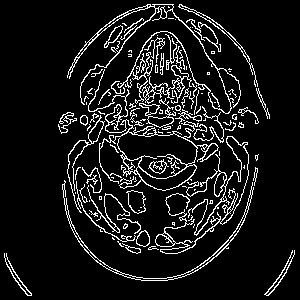

True

In [8]:
## Edge Detection (Canny)
# Import Library
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load data gambar
img = cv2.imread('/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg', 0)

# Segmentasi menggunakan canny
Tepi = cv2.Canny(img,30,200)

# Menampilkan hasil
print('Original grayscale')
cv2_imshow(img)
print('Edge Detection Canny')
cv2_imshow(Tepi)

# Menyimpan gambar
cv2.imwrite('/content/drive/MyDrive/Stroke/Dataset-Gambar/hemorrhagic1canny.jpg',Tepi)

7. Preprocessing Augmentation (Flip, Random Crop, Random Rotation, Random Resize Crop, Center Crop, Random Affine, Shear and Color Jitter (Brightness and Contrast)

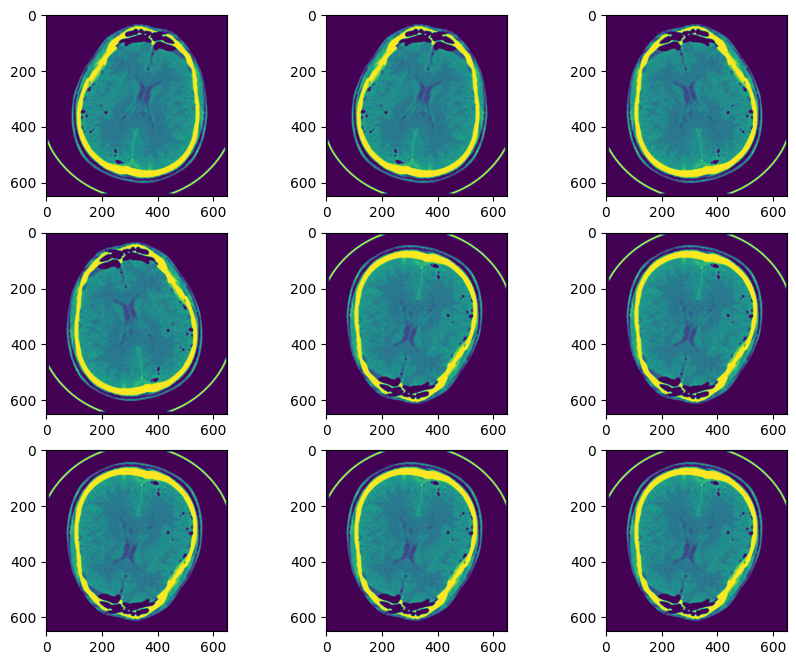

In [20]:
#Flip
from torchvision import transforms
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')

flip = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip()
])

fig, axes = plt.subplots(3, 3, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(flip(img))

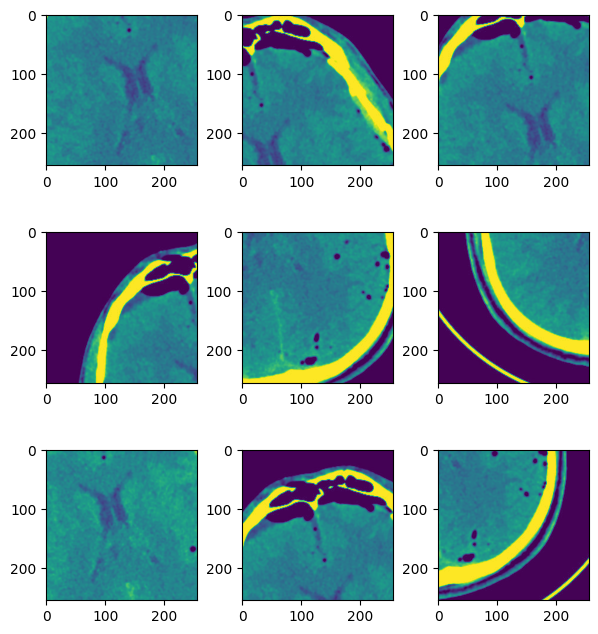

In [10]:
# Crop
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
crop = torchvision.transforms.RandomCrop(size=256)

fig, axes = plt.subplots(3, 3, figsize=(7, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(crop(img))

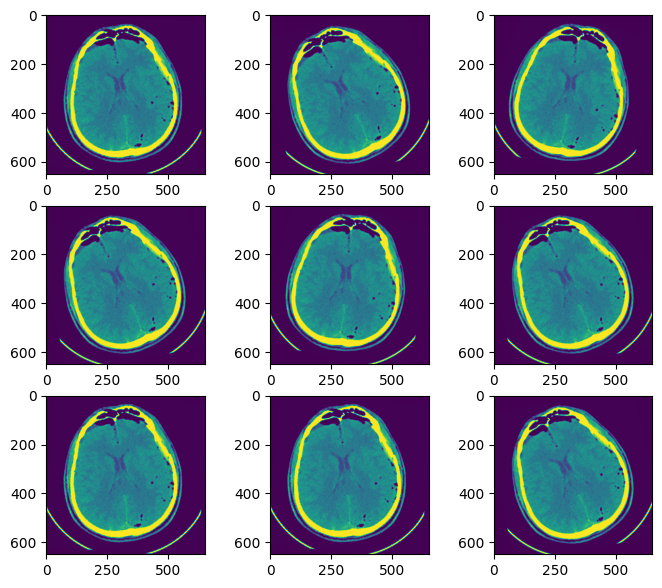

In [11]:
# Random Rotation
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
rotate = torchvision.transforms.RandomRotation(degrees=20)

fig, axes = plt.subplots(3, 3, figsize=(8, 7))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(rotate(img))

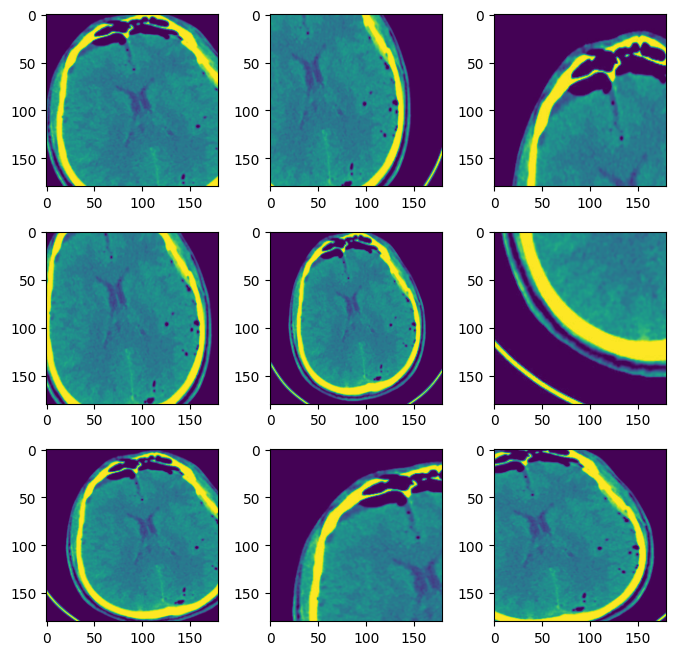

In [12]:
# Random Size Crop
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
resize_crop = torchvision.transforms.RandomResizedCrop(size=180)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(resize_crop(img))

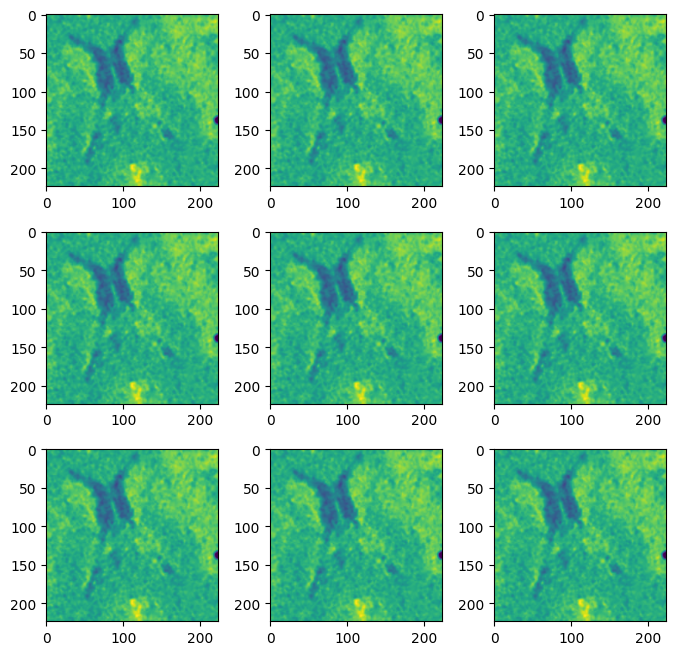

In [13]:
# Center Crop
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
center_crop = torchvision.transforms.CenterCrop(size=224)

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(center_crop(img))

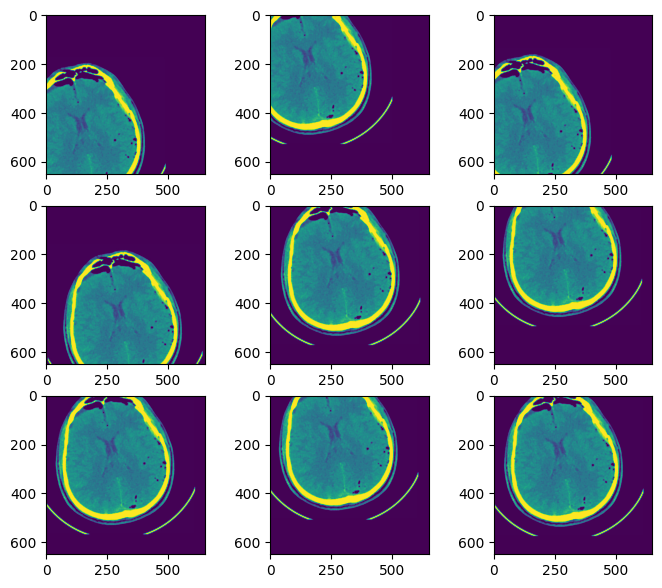

In [14]:
# Random Affine Translate
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
translate = torchvision.transforms.RandomAffine(degrees=0, translate=(0.3, 0.3))

fig, axes = plt.subplots(3, 3, figsize=(8, 7))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(translate(img))

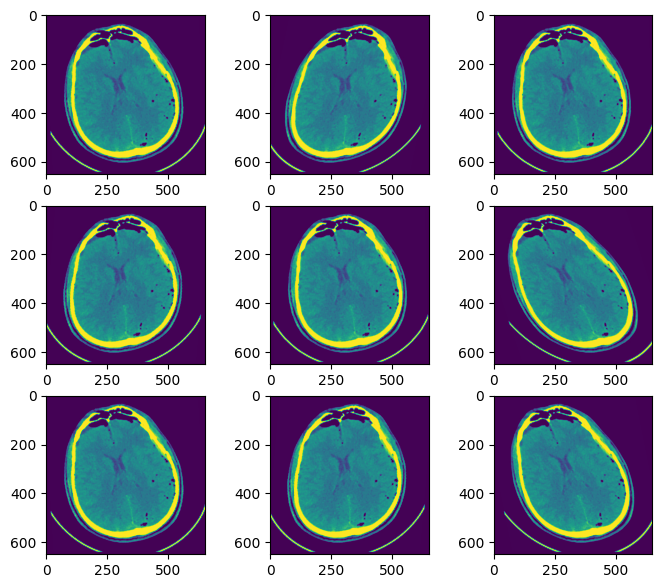

In [15]:
# Random Affine Shear
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
shear = torchvision.transforms.RandomAffine(0, shear=20)

fig, axes = plt.subplots(3, 3, figsize=(8, 7))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(shear(img))

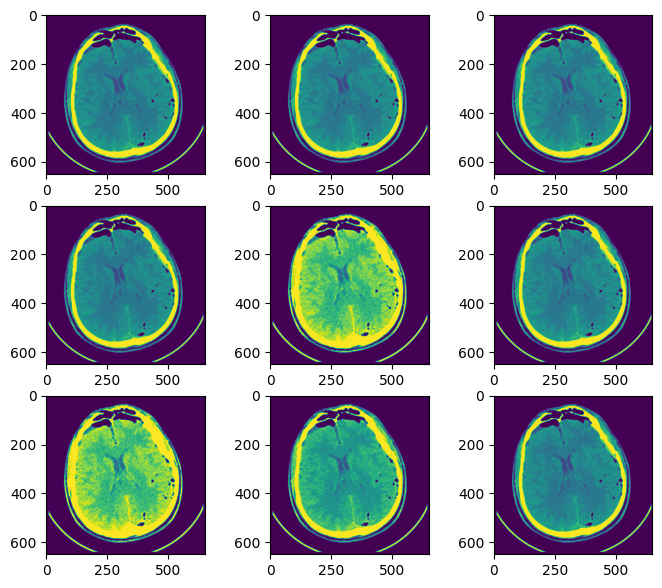

In [16]:
# Color Jitter - Brightness
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
brightness = torchvision.transforms.ColorJitter(brightness=0.8)

fig, axes = plt.subplots(3, 3, figsize=(8, 7))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(brightness(img))

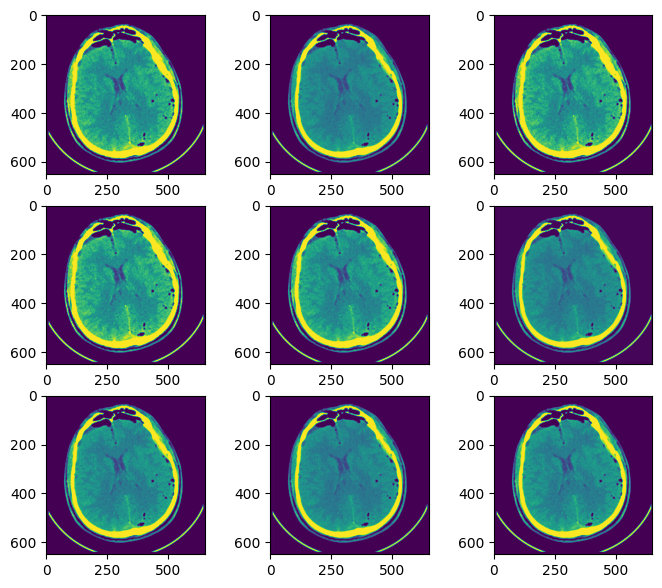

In [17]:
# Color Jitter - Contrast
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Stroke/Ischemic-1.jpg')
contrast = torchvision.transforms.ColorJitter(contrast=0.8)

fig, axes = plt.subplots(3, 3, figsize=(8, 7))
fig.subplots_adjust(wspace=0.3)
for ax in axes.flatten():
    ax.imshow(contrast(img))

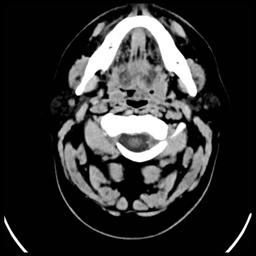

Original Image


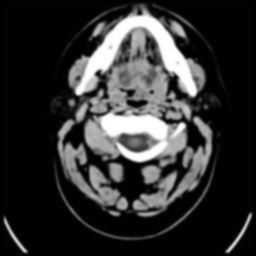

Blurred Image


True

In [32]:
# prompt: preprocess gaussian blur

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img_path = '/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg'
img = cv2.imread(img_path)

# Apply Gaussian Blur
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)  # Adjust kernel size (5, 5) and sigma (0) as needed

# Display the original and blurred images
cv2_imshow(img)
print('Original Image')
cv2_imshow(blurred_img)
print('Blurred Image')

# Save the blurred image
cv2.imwrite('/content/drive/MyDrive/Stroke/Dataset-Gambar/hemorrhagic1blurred.jpg', blurred_img)

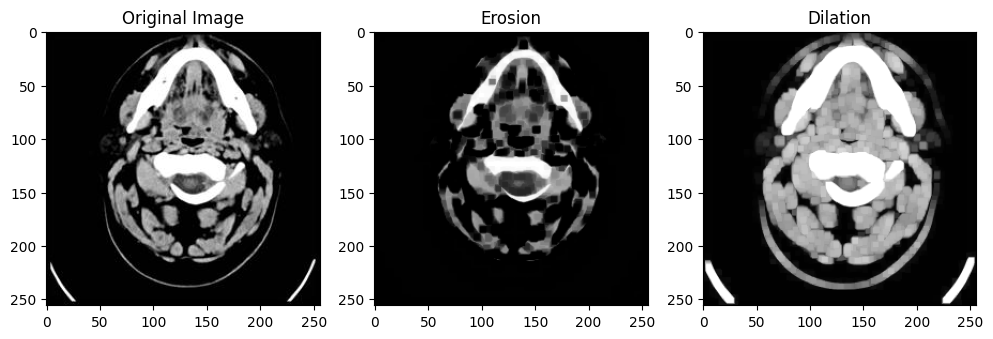

In [29]:
# prompt: erosion and dilation and title with matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg'  # Replace with your image path
img = cv2.imread(img_path, 0)  # Load as grayscale

# Define kernel size for morphological operations
kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size as needed

# Erosion
erosion = cv2.erode(img, kernel, iterations=1)  # Adjust iterations as needed

# Dilation
dilation = cv2.dilate(img, kernel, iterations=1)  # Adjust iterations as needed

# Display the original, eroded, and dilated images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Erosion')
plt.imshow(erosion, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Dilation')
plt.imshow(dilation, cmap='gray')

plt.show()

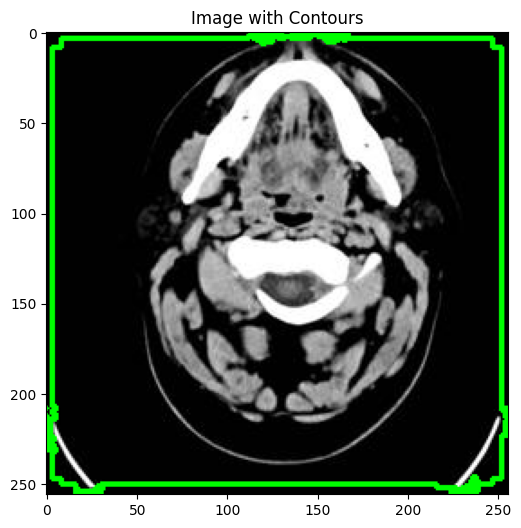

In [35]:
# prompt: contour with title

import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
img_path = '/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg'  # Replace with your image path
img = cv2.imread(img_path, 0)  # Load as grayscale

# Find contours
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw contours on
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color

# Draw contours on the image
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2) # Green contours, thickness 2


# Display the image with contours and title
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_with_contours, cv2.COLOR_BGR2RGB))
plt.title("Image with Contours")
plt.show()

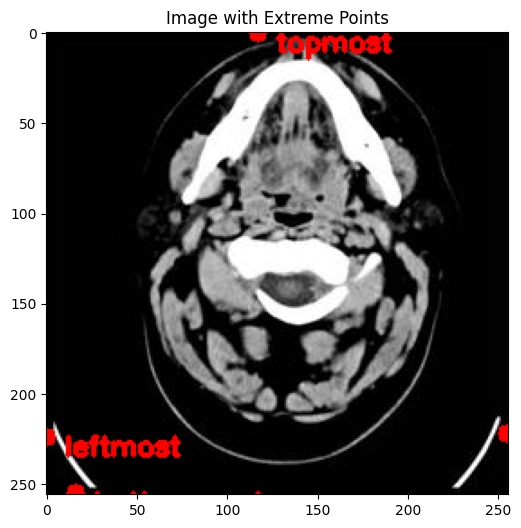

In [37]:
# prompt: extreme point

# Assuming you want to find the extreme points (top-left, top-right, bottom-left, bottom-right) of a contour

import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_extreme_points(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, 0)

    # Find contours
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No contours found in the image.")
        return None

    # Assuming the largest contour is the object of interest
    largest_contour = max(contours, key=cv2.contourArea)

    # Find extreme points of the contour
    leftmost = tuple(largest_contour[largest_contour[:, :, 0].argmin()][0])
    rightmost = tuple(largest_contour[largest_contour[:, :, 0].argmax()][0])
    topmost = tuple(largest_contour[largest_contour[:, :, 1].argmin()][0])
    bottommost = tuple(largest_contour[largest_contour[:, :, 1].argmax()][0])

    extreme_points = {
        "leftmost": leftmost,
        "rightmost": rightmost,
        "topmost": topmost,
        "bottommost": bottommost,
    }

    # Draw extreme points on the image (optional)
    img_with_points = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for label, point in extreme_points.items():
      cv2.circle(img_with_points, point, 5, (0, 0, 255), -1)  # Red circles
      cv2.putText(img_with_points, label, (point[0] + 10, point[1] + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Display image with points
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img_with_points, cv2.COLOR_BGR2RGB))
    plt.title("Image with Extreme Points")
    plt.show()

    return extreme_points

# Example usage:
image_path = '/content/drive/MyDrive/Stroke/Dataset-Gambar/Hemorrhagicresized1.jpg'  # Replace with your image path
extreme_points = find_extreme_points(image_path)

if extreme_points:
  extreme_points